# Run

## Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
from scipy.stats import kruskal
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import mannwhitneyu

In [3]:
sns.set_theme(style='white', rc={'figure.facecolor': '#efefef','axes.facecolor': '#efefef'})

In [4]:
saas_df = pd.read_csv('SaaS-Sales.csv')

## Preliminary info

In [5]:
saas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [6]:
saas_df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [7]:
saas_df['Order Date'].min()

'1/1/2023'

In [8]:
saas_df['Order Date'].max()

'9/9/2023'

## Data Cleaning

#### tbd outlier checking, tapi bisa tetep dimasukin karena data sales

In [9]:
saas_df.nunique()

Row ID          9994
Order ID        5009
Order Date      1237
Date Key        1237
Contact Name     793
Country           48
City             262
Region             3
Subregion         12
Customer          99
Customer ID       99
Industry          10
Segment            3
Product           14
License         9994
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
saas_df[saas_df['Sales']<=0]

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


In [11]:
saas_df[saas_df['Quantity']<=0]

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


In [12]:
saas_df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Data transformation

In [13]:
# drop date key because its redundant and help improve readability
#saas_df.drop('Date Key',axis=1, inplace=True)
saas_df.head(10)
#saas_df.drop('discount_in_number',axis=1, inplace=True)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
5,6,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694
6,7,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.2800,4,0.00,1.9656
7,8,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
8,9,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,XPBOBXWXA3,18.5040,3,0.20,5.7825
9,10,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,OneView,71J8P9Z1P0,114.9000,5,0.00,34.4700


In [14]:
saas_df['Order Date'] = pd.to_datetime(saas_df['Order Date'], format='%m/%d/%Y')
saas_df['month'] = saas_df['Order Date'].dt.month
saas_df['day'] = saas_df['Order Date'].dt.day
saas_df['year']= saas_df['Order Date'].dt.year
saas_df['effective_price'] = saas_df["Sales"] / saas_df['Quantity']
saas_df['unit_price'] = (saas_df["Sales"] / (1-(saas_df['Discount']))) / saas_df['Quantity']
saas_df['true_amount'] = saas_df['Sales'] /(1-saas_df['Discount'])
saas_df['cogs'] = saas_df['Sales'] - saas_df['Profit']
saas_df['regional_customer'] = saas_df['Customer']+'_'+saas_df['Region']
saas_df['discount_amount'] = saas_df['true_amount'] * saas_df['Discount']



In [15]:
# sorted df by order date
sorted_df = saas_df.sort_values('Order Date', ascending= True).copy()
# filtered df by region
EMEA_df = saas_df[saas_df['Region']== 'EMEA'].copy() 
AMER_df = saas_df[saas_df['Region']== 'AMER'].copy() 
APJ_df = saas_df[saas_df['Region']== 'APJ'].copy() 
# filtered by year
df_2023 = saas_df[saas_df['year']==2023].copy()
df_2022 = saas_df[saas_df['year']==2022].copy()
df_2021 = saas_df[saas_df['year']==2021].copy()
df_2020 = saas_df[saas_df['year']==2020].copy()
analysis_date = saas_df['Order Date'].max() + pd.Timedelta(days=1)

In [16]:
saas_df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Profit,month,day,year,effective_price,unit_price,true_amount,cogs,regional_customer,discount_amount
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,41.9136,11,9,2022,130.9800,130.98,261.96,220.0464,Chevron_EMEA,0.0000
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,219.5820,11,9,2022,243.9800,243.98,731.94,512.3580,Chevron_EMEA,0.0000
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,6.8714,6,13,2022,7.3100,7.31,14.62,7.7486,Phillips 66_AMER,0.0000
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,-383.0310,10,11,2021,191.5155,348.21,1741.05,1340.6085,Royal Dutch Shell_EMEA,783.4725
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,2.5164,10,11,2021,11.1840,13.98,27.96,19.8516,Royal Dutch Shell_EMEA,5.5920


## EDA

In [17]:
saas_df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

In [18]:
sorted_df['Order Date'].max()

Timestamp('2023-12-31 00:00:00')

In [19]:
sorted_df['Order Date'].min()

Timestamp('2020-01-04 00:00:00')

In [20]:
saas_df.groupby('Customer')['Profit'].sum().reset_index().sort_values('Profit', ascending=False)

,Customer,Profit
92,Valero Energy,10308.6297
28,Coca-Cola,9449.0246
88,Trafigura Group,8867.8252
62,Mondelez International,8577.6524
55,Lowes,7937.4915
...,...,...
95,Walgreens,-740.6747
31,Costco Wholesale,-1354.8547
66,Nissan Motor,-1585.1886
19,Bosch,-1823.7794


### Problem Analysis

#### profit by customer

In [21]:

saas_df.groupby('Customer')['Profit'].sum().reset_index().sort_values('Profit', ascending=False)

,Customer,Profit
92,Valero Energy,10308.6297
28,Coca-Cola,9449.0246
88,Trafigura Group,8867.8252
62,Mondelez International,8577.6524
55,Lowes,7937.4915
...,...,...
95,Walgreens,-740.6747
31,Costco Wholesale,-1354.8547
66,Nissan Motor,-1585.1886
19,Bosch,-1823.7794


In [22]:
customer_profitability = saas_df.groupby('Customer')['Profit'].sum().reset_index().sort_values('Profit', ascending=True)
customer_profitability.describe()


,Profit
count,99.000000
mean,2892.899209
std,2473.043737
min,-2796.293500
25%,1183.343700
50%,2579.161700
75%,4483.240050
max,10308.629700


In [23]:
customer_profitability[customer_profitability['Profit']<=1183.343700].count()

Customer    25
Profit      25
dtype: int64

In [24]:
customer_profitability[customer_profitability['Profit']<= 0]['Profit'].sum()

-9380.3304

In [25]:
cust_df = saas_df.groupby(['Customer','Region'])['Profit'].sum().reset_index().sort_values('Profit', ascending=True)

In [26]:
list_neg_APJ = cust_df[(cust_df['Region']=='APJ')&(cust_df['Profit']<= 0)].Customer.to_list()
len(list_neg_APJ)

44

In [27]:
cust_df[cust_df['Customer'].isin(list_neg_APJ)].sort_values('Customer').head(40)

,Customer,Region,Profit
0,AT&T,AMER,2704.3399
2,AT&T,EMEA,1853.7878
1,AT&T,APJ,-37.4636
5,Abbott Laboratories,EMEA,400.6551
3,Abbott Laboratories,AMER,2055.8575
4,Abbott Laboratories,APJ,-174.7735
20,Alphabet,EMEA,390.1501
19,Alphabet,APJ,-101.8086
18,Alphabet,AMER,3692.0042
23,Amazon,EMEA,323.7004


In [28]:
saas_df.groupby('regional_customer')['Profit'].sum().reset_index().sort_values('Profit', ascending=True).head(20)

,regional_customer,Profit
58,Bosch_APJ,-3643.5525
15,Allstate_AMER,-3315.4313
95,Costco Wholesale_EMEA,-2744.0747
191,Morgan Stanley_EMEA,-2605.4983
199,Nissan Motor_APJ,-2039.2976
285,Walgreens_AMER,-1816.7989
115,Ford Motor_APJ,-1683.8923
154,Itochu_APJ,-1666.0486
268,Tyson Foods_APJ,-1342.5237
113,FedEx_EMEA,-1229.5500


#### profit by year

In [29]:
saas_df.groupby('year')['Profit'].sum().reset_index()

,year,Profit
0,2020,49543.9741
1,2021,61618.6037
2,2022,81726.9308
3,2023,93507.5131


In [30]:
saas_df.groupby(['year','Region'])['Profit'].sum().reset_index()

,year,Region,Profit
0,2020,AMER,19796.8565
1,2020,APJ,-5179.6750
2,2020,EMEA,34926.7926
3,2021,AMER,21984.2575
4,2021,APJ,5912.9351
5,2021,EMEA,33721.4111
6,2022,AMER,30064.7717
7,2022,APJ,7636.3522
8,2022,EMEA,44025.8069
9,2023,AMER,55581.1041


HO : there is no difference in median in 1. sales, 2. discount, 3 unit price between regions

H1 : there is  in difference median

In [31]:
stat, p = kruskal(EMEA_df[['Sales','Discount','unit_price']], AMER_df[['Sales','Discount','unit_price']], APJ_df[['Sales','Discount','unit_price']])
p

array([1.34433232e-008, 1.71195725e-155, 9.78615230e-001])

we accept H0 for unit price and can safely assume that there is no significant difference for unit price between region

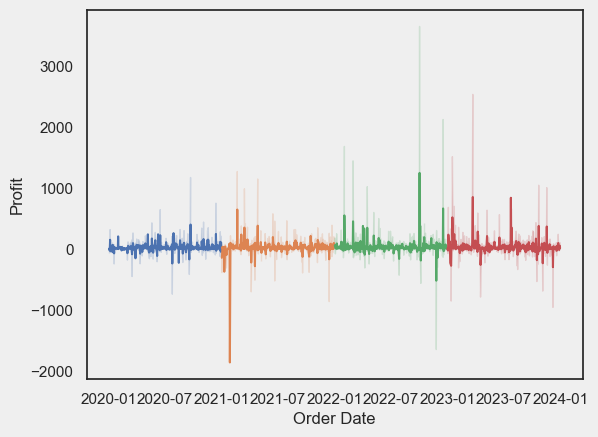

In [32]:
year_list = (2020,2021,2022,2023)

for year in year_list: 
    sns.lineplot(saas_df[saas_df['year']== year], x = 'Order Date', y = 'Profit')

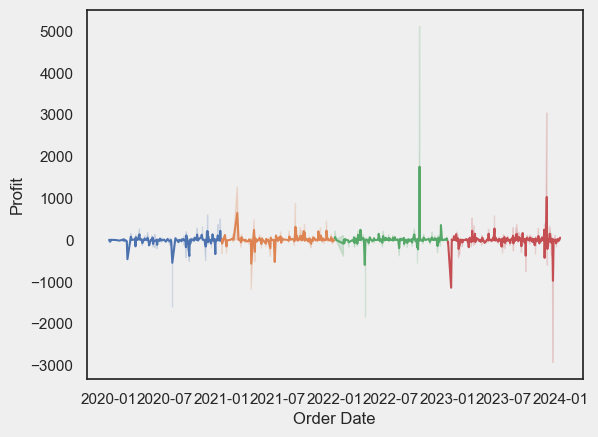

In [33]:
for year in year_list: 
    sns.lineplot(APJ_df[APJ_df['year']== year], x = 'Order Date', y = 'Profit')

In [34]:
APJ_df_2020 = APJ_df[APJ_df['year']==2020].copy()
APJ_df_2021 = APJ_df[APJ_df['year']==2021].copy()
APJ_df_2022 = APJ_df[APJ_df['year']==2022].copy()
APJ_df_2023 = APJ_df[APJ_df['year']==2023].copy()

stat, p = mannwhitneyu(APJ_df_2022['Quantity'],APJ_df_2023['Quantity'])
p

0.4162848216795644

In [35]:
stat, p = mannwhitneyu(APJ_df_2021['Quantity'],APJ_df_2022['Quantity'])
p

0.7872694946593939

In [36]:
stat, p = kruskal(APJ_df_2020['Quantity'],APJ_df_2021['Quantity'],APJ_df_2022['Quantity'],APJ_df_2023['Quantity'])
p

0.8476982819941161

H₀ (null hypothesis): There is no statistically significant difference in the distribution of Quantity across the years 2020 to 2023 (i.e., all groups come from the same population).

H₁ (alternative hypothesis): There is at least one year where the distribution of Quantity differs significantly from the others.

Based on the Kruskal-Wallis test, we failed to reject the null hypothesis (p > 0.05).
Insight: There is no significant difference in the Quantity distribution across the years 2020–2023.
This suggests the data across these years can be considered as coming from the same population in terms of quantity ordered.

#### analysis on discount

In [37]:
discount_performance = saas_df.groupby('Customer').agg({'Profit':'sum',
                                 'Discount' : ['sum','mean']
                                 }).reset_index()
discount_performance.columns = (['Customer','total profit','total discount','avg discount'])
discount_performance.sort_values('total profit').head(15)

,Customer,total profit,total discount,avg discount
5,Allstate,-2796.2935,13.00,0.123810
19,Bosch,-1823.7794,19.60,0.164706
66,Nissan Motor,-1585.1886,12.52,0.178857
31,Costco Wholesale,-1354.8547,8.50,0.137097
95,Walgreens,-740.6747,10.20,0.150000
82,Sprint Nextel,-462.6587,17.20,0.170297
63,Morgan Stanley,-361.8099,22.00,0.174603
46,HonHai Precision Industry,-136.6992,11.40,0.129545
44,HSBC Holdings,-104.4022,15.45,0.186145
39,Gazprom,-13.9695,9.70,0.183019


<Axes: xlabel='Discount', ylabel='Sales'>

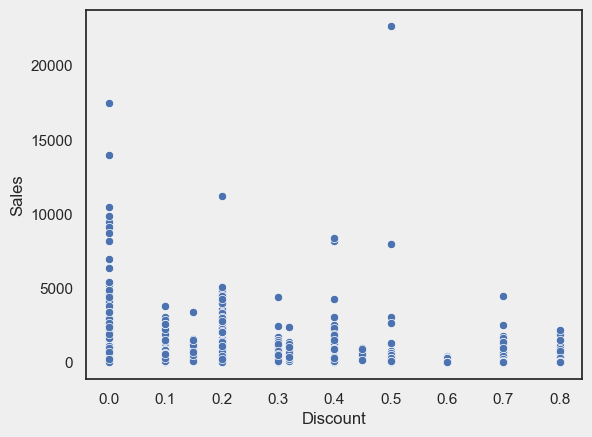

In [38]:
sns.scatterplot(saas_df, x = 'Discount', y = 'Sales')

<Axes: xlabel='Discount', ylabel='Profit'>

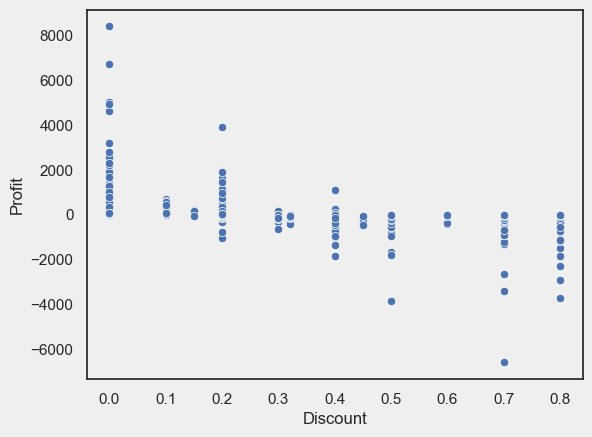

In [39]:
sns.scatterplot(saas_df, x = 'Discount', y = 'Profit')
#BOXPLOT

In [40]:
saas_df['discount_in_number'] = saas_df['true_amount'] * saas_df['Discount']

In [41]:
saas_df.groupby(['Region','year'])['discount_amount'].sum()

Region  year
AMER    2020    31480.7370
        2021    32898.8565
        2022    48410.7625
        2023    46370.2495
APJ     2020    47775.8324
        2021    27132.8250
        2022    33787.9360
        2023    56651.6058
EMEA    2020    58690.1225
        2021    48878.9895
        2022    55247.3915
        2023    79408.8715
Name: discount_amount, dtype: float64

In [42]:
saas_df.groupby('Customer')

### LRFM Analysis

#### all customer

In [43]:
lrfm_all = saas_df.groupby('Customer').agg({
    'Order Date': [
        lambda x: (analysis_date - x.min()).days,   # Length
        lambda x: (analysis_date - x.max()).days,   # Recency
        'count'                                     # Frequency
    ],
    'Sales': 'sum'
}).reset_index()

lrfm_all.columns = ['customer', 'Length', 'Recency', 'Frequency', 'Monetary']


In [44]:
lrfm_all

,customer,Length,Recency,Frequency,Monetary
0,AT&T,1391,10,151,29462.3240
1,Abbott Laboratories,1356,13,67,12617.1140
2,Aetna,1371,22,153,27278.5930
3,Airbus,1451,28,123,29798.5930
4,Allianz,1385,2,192,42904.1670
...,...,...,...,...,...
94,Volkswagen,1424,22,134,35200.4240
95,Walgreens,1419,15,68,14420.6190
96,Walmart,1398,21,115,21508.1790
97,Walt Disney,1369,23,103,29483.0050


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

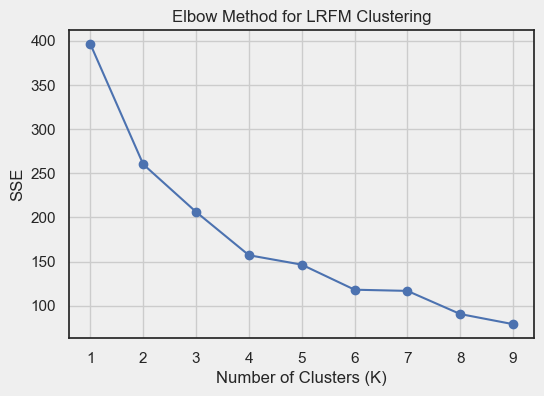

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Normalize features for clustering
features = ['Length', 'Recency', 'Frequency', 'Monetary']
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(lrfm_all[features])

# Elbow method to determine optimal clusters
sse = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(6, 4))
plt.plot(K_range, sse, marker='o')
plt.title("Elbow Method for LRFM Clustering")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE")
plt.grid(True)
plt.show()

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

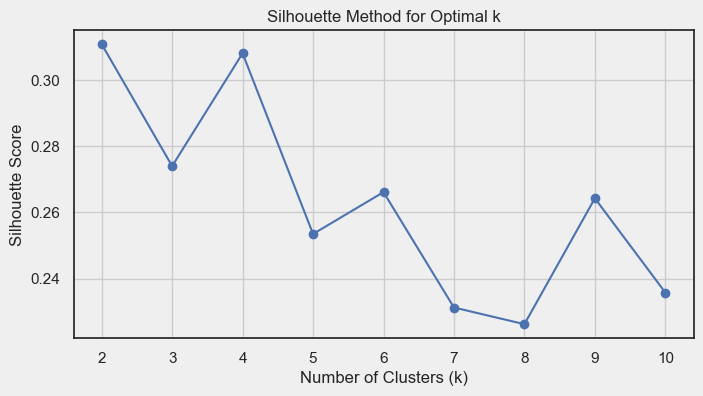

In [46]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
K = range(2, 11)  # silhouette score is undefined for k=1

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X1_scaled)
    score = silhouette_score(X1_scaled, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid(True)
plt.show()

In [47]:
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
lrfm_all['Cluster'] = kmeans.fit_predict(X1_scaled)

# Optional: Sort by average monetary value
Cluster_summary = lrfm_all.groupby('Cluster')[features].mean().sort_values('Monetary', ascending=False)
print(Cluster_summary)

              Length     Recency   Frequency      Monetary
Cluster                                                   
1        1413.114286   11.571429  137.000000  33759.699571
2        1408.000000   18.880952   84.857143  18011.206695
0        1296.052632   19.000000   73.631579  16437.836732
3        1392.666667  151.666667   78.666667  15607.265400


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [48]:
import plotly.express as px

color_map = {
    '0' : 'red',
    '1' : 'green',
    '2' : 'blue',
}

fig = px.scatter_3d(
    lrfm_all,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Cluster',
    color_discrete_map=color_map,
)

fig.update_traces(marker_size = 3)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
                    'text': "RFM segmentation",
                    'y':0.97,
                    'x':0.45,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                    legend=dict(
                      yanchor="top",
                      y=0.97,
                      xanchor="left",
                      x=0.70,
                      itemsizing='constant',
                      itemwidth = 30))

fig.update_xaxes(tickformat=".0f")

#### per region

In [49]:
lrfm_region = saas_df.groupby('regional_customer').agg({
    'Order Date': [
        lambda x: (analysis_date - x.min()).days,   # Length
        lambda x: (analysis_date - x.max()).days,   # Recency
        'count'                                     # Frequency
    ],
    'Sales': 'sum'
}).reset_index()

lrfm_region.columns = ['regional_customer', 'Length', 'Recency', 'Frequency', 'Monetary']

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

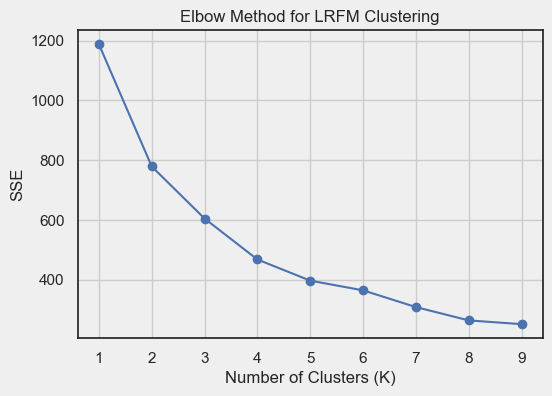

In [50]:
X2_scaled = scaler.fit_transform(lrfm_region[features])

# Elbow method to determine optimal clusters
sse = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X2_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(6, 4))
plt.plot(K_range, sse, marker='o')
plt.title("Elbow Method for LRFM Clustering")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE")
plt.grid(True)
plt.show()

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

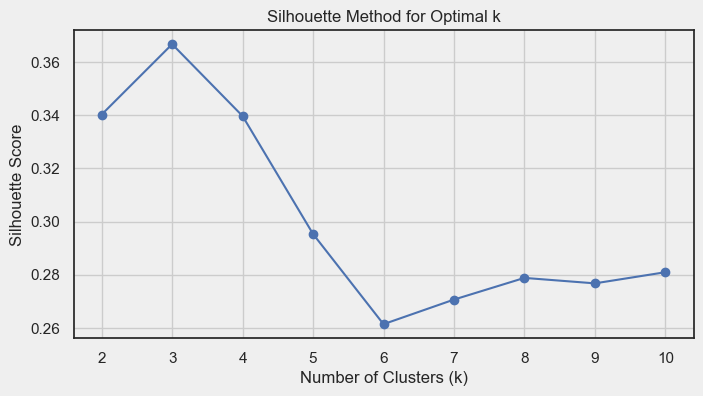

In [51]:
from sklearn.metrics import silhouette_score
silhouette_scores_region = []
K = range(2, 11)  # silhouette score is undefined for k=1

for k in K:
    kmeans_region = KMeans(n_clusters=k, random_state=42)
    labels_region = kmeans_region.fit_predict(X2_scaled)
    score_region = silhouette_score(X2_scaled, labels_region)
    silhouette_scores_region.append(score_region)
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores_region, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid(True)
plt.show()

In [52]:
silhouette_scores_region[1]

0.3668082730850966

In [53]:
score_region

0.2809430043373687

In [54]:
optimal_k = 3  # change based on elbow result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
lrfm_region['Cluster'] = kmeans.fit_predict(X2_scaled)

# Optional: Sort by average monetary value
region_cluster_summary = lrfm_region.groupby('Cluster')[features].mean().sort_values('Monetary', ascending=False)
print(region_cluster_summary)

              Length     Recency  Frequency      Monetary
Cluster                                                  
0        1353.278689   30.836066  49.795082  12648.179783
1        1229.895062   52.648148  22.808642   4355.799230
2        1260.538462  472.692308  17.230769   3729.496277


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [55]:
color_map = {
    '0' : '#f14a16',
    '1' : '#fc9918',
    '2' : '#35589a',
}

fig = px.scatter_3d(
    lrfm_region,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Cluster',
    color_discrete_map=color_map,
)

fig.update_traces(marker_size = 3)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
                    'text': "RFM segmentation",
                    'y':0.97,
                    'x':0.45,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                    legend=dict(
                      yanchor="top",
                      y=0.97,
                      xanchor="left",
                      x=0.70,
                      itemsizing='constant',
                      itemwidth = 30))

fig.update_xaxes(tickformat=".0f")

In [56]:
#lrfm_region.drop('Segment',axis= 1, inplace= True)

In [57]:
lrfm_region['Customer_segment'] = lrfm_region['Cluster'].apply(lambda x : 'Top Performers' if x == 0 else 'mid and underpriced' if x==1 else 'Dormant')

In [58]:
lrfm_region.head(40)

,regional_customer,Length,Recency,Frequency,Monetary,Cluster,Customer_segment
0,AT&T_AMER,1391,20,67,12667.1200,0,Top Performers
1,AT&T_APJ,1112,57,13,707.8920,1,mid and underpriced
2,AT&T_EMEA,1226,10,71,16087.3120,0,Top Performers
3,Abbott Laboratories_AMER,1356,78,43,10118.1370,0,Top Performers
4,Abbott Laboratories_APJ,1121,70,9,584.0850,1,mid and underpriced
5,Abbott Laboratories_EMEA,1349,13,15,1914.8920,1,mid and underpriced
6,Aetna_AMER,1353,37,71,13748.4740,0,Top Performers
7,Aetna_APJ,1371,30,30,3665.2660,1,mid and underpriced
8,Aetna_EMEA,1342,22,52,9864.8530,0,Top Performers
9,Airbus_AMER,1448,47,38,9560.7710,0,Top Performers


In [59]:
lrfm_region[['Customer', 'Region']] = lrfm_region['regional_customer'].str.split('_', expand=True)

In [60]:
lrfm_region.groupby(['Cluster','Region']).agg({
    'Customer' : 'count'
})

Customer
Cluster Region          
0       AMER          45
        APJ            8
        EMEA          69
1       AMER          52
        APJ           85
        EMEA          25
2       AMER           2
        APJ            6
        EMEA           5

In [61]:
region_cluster_summary

,Length,Recency,Frequency,Monetary
Cluster,,,,
0,1353.278689,30.836066,49.795082,12648.179783
1,1229.895062,52.648148,22.808642,4355.799230
2,1260.538462,472.692308,17.230769,3729.496277


In [62]:
score_all = silhouette_score(X1_scaled,labels)
score_region = silhouette_score(X2_scaled, labels_region)

print("Silhouette Score - All:", score_all)
print("Silhouette Score - Region Split:", score_region)

Silhouette Score - All: 0.23583052362724716
Silhouette Score - Region Split: 0.2809430043373687


from this we can conclude that setiap customer memiliki pola yang berbeda tergantung regionnya, bahkan untuk top performing customer di region tertentu, AMER atau EMEA, tapi tidak perform di APJ
 menilai dari silhouette score yang dihasilkan, ketika customer di split berdasarkan regionnya, memiliki nilai silhouette yang lebik baik.
 dari hasil clustering pun, terlihat lebih terkelompokan. 

 setelah di split, cluster 1 menunjukan top performers, segment 2 menunjukan under valued, dan ke 3 dormant. 

##### APJ df merging with clustered DF

In [63]:
APJ_df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Profit,month,day,year,effective_price,unit_price,true_amount,cogs,regional_customer,discount_amount
14,15,APJ-2021-118983,2021-11-22,20211122,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,...,-123.8580,11,22,2021,13.7620,68.81,344.05,192.6680,Pfizer_APJ,275.2400
15,16,APJ-2021-118983,2021-11-22,20211122,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,...,-3.8160,11,22,2021,0.8480,4.24,12.72,6.3600,Pfizer_APJ,10.1760
34,35,APJ-2023-107727,2023-10-20,20231020,Amelia Campbell,Japan,Tokyo,APJ,JAPN,Glencore,...,9.9468,10,20,2023,9.8240,12.28,36.84,19.5252,Glencore_APJ,7.3680
35,36,APJ-2022-117590,2022-12-09,20221209,Chloe Short,Japan,Aichi,APJ,JAPN,Procter & Gamble,...,123.4737,12,9,2022,156.7920,195.99,1371.93,974.0703,Procter & Gamble_APJ,274.3860
36,37,APJ-2022-117590,2022-12-09,20221209,Chloe Short,Japan,Aichi,APJ,JAPN,Procter & Gamble,...,-147.9630,12,9,2022,38.1840,95.46,477.30,338.8830,Procter & Gamble_APJ,286.3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,APJ-2021-168088,2021-03-19,20210319,Harry Buckland,Japan,Tokyo,APJ,JAPN,News Corp.,...,-67.6704,3,19,2021,95.8664,140.98,563.92,451.1360,News Corp._APJ,180.4544
9964,9965,APJ-2022-146374,2022-12-06,20221206,Emma Watson,Philippines,Manila,APJ,APAC,United Parcel Service,...,6.4320,12,6,2022,13.4000,13.40,13.40,6.9680,United Parcel Service_APJ,0.0000
9965,9966,APJ-2022-146374,2022-12-06,20221206,Emma Watson,Philippines,Manila,APJ,APAC,United Parcel Service,...,2.3406,12,6,2022,4.9800,4.98,4.98,2.6394,United Parcel Service_APJ,0.0000
9966,9967,APJ-2022-146374,2022-12-06,20221206,Emma Watson,Philippines,Manila,APJ,APAC,United Parcel Service,...,51.5543,12,6,2022,15.6700,15.67,109.69,58.1357,United Parcel Service_APJ,0.0000


In [64]:
APJ_df_clustered = pd.merge(APJ_df, lrfm_region, on='regional_customer', how='left')
# APJ_df_clustered.drop(['Customer_y','Region_y'],axis=1, inplace=True)

In [65]:
APJ_df_clustered.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region_x,Subregion,Customer_x,...,regional_customer,discount_amount,Length,Recency,Frequency,Monetary,Cluster,Customer_segment,Customer_y,Region_y
0,15,APJ-2021-118983,2021-11-22,20211122,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,...,Pfizer_APJ,275.240,1330,37,21,2743.6282,1,mid and underpriced,Pfizer,APJ
1,16,APJ-2021-118983,2021-11-22,20211122,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,...,Pfizer_APJ,10.176,1330,37,21,2743.6282,1,mid and underpriced,Pfizer,APJ
2,35,APJ-2023-107727,2023-10-20,20231020,Amelia Campbell,Japan,Tokyo,APJ,JAPN,Glencore,...,Glencore_APJ,7.368,1374,65,22,4212.0900,1,mid and underpriced,Glencore,APJ
3,36,APJ-2022-117590,2022-12-09,20221209,Chloe Short,Japan,Aichi,APJ,JAPN,Procter & Gamble,...,Procter & Gamble_APJ,274.386,1134,73,10,3073.5072,1,mid and underpriced,Procter & Gamble,APJ
4,37,APJ-2022-117590,2022-12-09,20221209,Chloe Short,Japan,Aichi,APJ,JAPN,Procter & Gamble,...,Procter & Gamble_APJ,286.380,1134,73,10,3073.5072,1,mid and underpriced,Procter & Gamble,APJ


In [66]:
cluster_df = APJ_df_clustered.groupby('Customer_segment').agg({
    'Profit' : 'sum',
    'License' : 'count',
    'Discount' : 'sum',
    'discount_amount': 'sum'
}).reset_index()
cluster_df.columns= ['Customer_segment','Profit','Transaction','total_Discount','total_Discount_amount']

In [67]:
cluster_df

,Customer_segment,Profit,Transaction,total_Discount,total_Discount_amount
0,Dormant,-1148.4829,90,29.62,5671.5814
1,Top Performers,9400.2624,308,80.44,30881.7530
2,mid and underpriced,3262.2074,1712,453.78,128794.8648


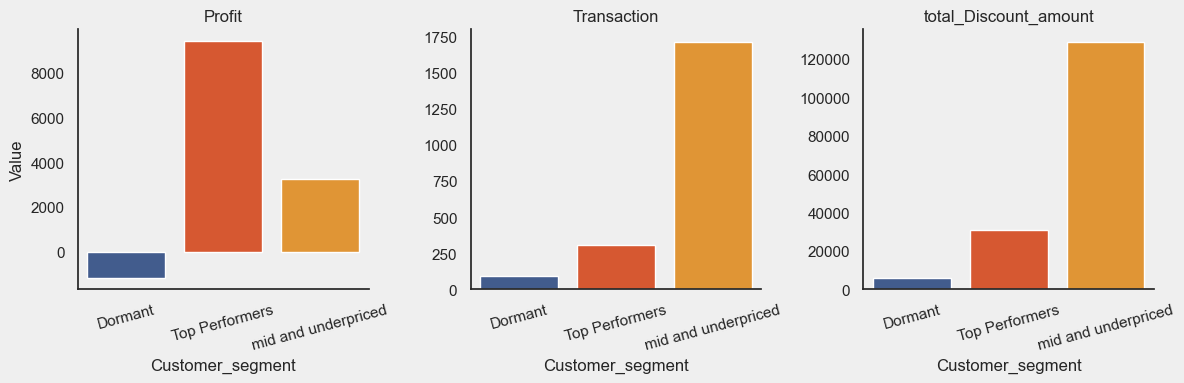

In [68]:

df_melted = cluster_df.melt(id_vars='Customer_segment', 
                    value_vars=['Profit', 'Transaction', 'total_Discount_amount'],
                    var_name='Metric', 
                    value_name='Value')
palette = {
    'Dormant': '#35589a',
    'Top Performers': '#f14a16',
    'mid and underpriced': '#fc9918'
}


g = sns.FacetGrid(df_melted, col="Metric", hue="Customer_segment", height=4, sharey=False, palette=palette)
g.map(sns.barplot, "Customer_segment", "Value", order=['Dormant', 'Top Performers', 'mid and underpriced'])
g.set_titles("{col_name}")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(15)
plt.tight_layout()
plt.show()

### Analysis on product

In [69]:
saas_df.groupby('Product')['License'].count()

Product
Alchemy                         68
Big Ol Database                115
ChatBot Plugin                 796
ContactMatcher                1842
Data Smasher                   775
FinanceHub                     981
Marketing Suite                228
Marketing Suite - Gold         846
OneView                        466
SaaS Connector Pack            957
SaaS Connector Pack - Gold     254
Site Analytics                 889
Storage                        217
Support                       1560
Name: License, dtype: int64

In [70]:
APJ_df.groupby('Product')['Profit'].sum().reset_index().sort_values('Profit')

,Product,Profit
3,ContactMatcher,-21583.6618
8,OneView,-5270.8407
9,SaaS Connector Pack,-3774.0631
1,Big Ol Database,-2077.9085
6,Marketing Suite,-1895.6634
12,Storage,170.5581
2,ChatBot Plugin,1122.5064
5,FinanceHub,1652.3162
10,SaaS Connector Pack - Gold,1885.8752
7,Marketing Suite - Gold,2718.0106


In [71]:
APJ_df_2023.groupby('Product')['Profit'].sum().reset_index().sort_values('Profit')

,Product,Profit
3,ContactMatcher,-11477.9709
8,OneView,-1176.8883
9,SaaS Connector Pack,-1077.2121
6,Marketing Suite,-341.5712
1,Big Ol Database,-160.3683
12,Storage,58.5725
10,SaaS Connector Pack - Gold,475.0134
2,ChatBot Plugin,491.5321
7,Marketing Suite - Gold,643.5220
5,FinanceHub,1235.8089


In [72]:
product_cluster_usage = APJ_df_clustered.groupby([ 'Product','Customer_segment']).agg({
    'Quantity': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).reset_index()

In [73]:
product_cluster_usage

,Product,Customer_segment,Quantity,Profit,Discount
0,Alchemy,Top Performers,10,9050.9622,0.133333
1,Alchemy,mid and underpriced,32,8768.9107,0.140000
2,Big Ol Database,Dormant,2,-97.7200,0.400000
3,Big Ol Database,Top Performers,11,-1379.4620,0.350000
4,Big Ol Database,mid and underpriced,54,-600.7265,0.311111
5,ChatBot Plugin,Dormant,16,10.4984,0.100000
6,ChatBot Plugin,Top Performers,99,148.3334,0.129032
7,ChatBot Plugin,mid and underpriced,507,963.6746,0.130827
8,ContactMatcher,Dormant,46,-714.4185,0.600000
9,ContactMatcher,Top Performers,230,-669.1108,0.439655


In [74]:
pivot_pcu = product_cluster_usage.pivot(index='Product', columns='Customer_segment', values='Profit').fillna(0)

In [75]:
pivot_pcu.sort_values(by='mid and underpriced',ascending=True)

Customer_segment,Dormant,Top Performers,mid and underpriced
Product,,,
ContactMatcher,-714.4185,-669.1108,-20200.1325
SaaS Connector Pack,-124.5906,-383.7164,-3265.7561
OneView,-389.9010,-1829.0886,-3051.8511
Marketing Suite,-19.8744,-888.6870,-987.1020
Big Ol Database,-97.7200,-1379.4620,-600.7265
Storage,0.0000,48.5531,122.0050
ChatBot Plugin,10.4984,148.3334,963.6746
FinanceHub,-277.3176,631.4190,1298.2148
Marketing Suite - Gold,-1.7226,1363.4230,1356.3102


In [76]:
product_cluster_usage[product_cluster_usage['Customer_segment'] == 'mid and underpriced'].sort_values('Profit')

,Product,Customer_segment,Quantity,Profit,Discount
10,ContactMatcher,mid and underpriced,1264,-20200.1325,0.548438
28,SaaS Connector Pack,mid and underpriced,608,-3265.7561,0.389091
25,OneView,mid and underpriced,289,-3051.8511,0.536842
19,Marketing Suite,mid and underpriced,129,-987.1020,0.221081
4,Big Ol Database,mid and underpriced,54,-600.7265,0.311111
36,Storage,mid and underpriced,149,122.0050,0.156757
7,ChatBot Plugin,mid and underpriced,507,963.6746,0.130827
16,FinanceHub,mid and underpriced,624,1298.2148,0.193293
22,Marketing Suite - Gold,mid and underpriced,499,1356.3102,0.137143
31,SaaS Connector Pack - Gold,mid and underpriced,176,1542.1090,0.144186


#### Price Elasticity of demand

In [77]:
cluster_1_underperforming_product = product_cluster_usage[product_cluster_usage['Customer_segment'] == 'mid and underpriced'].sort_values('Profit').head(3)
cluster_1_underperforming_product

,Product,Customer_segment,Quantity,Profit,Discount
10,ContactMatcher,mid and underpriced,1264,-20200.1325,0.548438
28,SaaS Connector Pack,mid and underpriced,608,-3265.7561,0.389091
25,OneView,mid and underpriced,289,-3051.8511,0.536842


In [78]:
list_underpeformed_products = cluster_1_underperforming_product['Product'].to_list()
list_underpeformed_products

['ContactMatcher', 'SaaS Connector Pack', 'OneView']

In [79]:
product_df = APJ_df[APJ_df['Product'].isin(list_underpeformed_products)].copy()

###### model function

In [80]:
def compute_elasticity_with_discount(df):
    results = []

    for product in df['Product'].unique():
        prod_df = df[df['Product'] == product].copy()

        # Filter out invalid data
        prod_df = prod_df[(prod_df['effective_price'] > 0) & (prod_df['Quantity'] > 0)]
        if prod_df.shape[0] < 10:
            continue

        # Log transformation
        prod_df['log_quantity'] = np.log(prod_df['Quantity'])
        prod_df['log_price'] = np.log(prod_df['effective_price'])

        if prod_df['log_price'].nunique() < 2 or prod_df['log_quantity'].nunique() < 2:
            continue

        # Regression with price and discount
        model = smf.ols('log_quantity ~ log_price + Discount', data=prod_df).fit()

        results.append({
            'Product': product,
            'Price Elasticity': model.params.get('log_price', np.nan),
            'N': len(prod_df),
            'model' : model
        })
    df_results = pd.DataFrame(results)
    return df_results

       

###### result

In [81]:
compute_elasticity_with_discount(product_df)

,Product,Price Elasticity,N,model
0,OneView,0.012446,97,<statsmodels.regression.linear_model.Regressio...
1,ContactMatcher,-0.018332,394,<statsmodels.regression.linear_model.Regressio...
2,SaaS Connector Pack,0.031488,202,<statsmodels.regression.linear_model.Regressio...


In [82]:
elasticity_df = compute_elasticity_with_discount(product_df)

###### Assumption 

Contact matcher

In [83]:
# Access model for a specific product
cm_model = elasticity_df.loc[elasticity_df['Product'] == 'ContactMatcher', 'model'].values[0]

# Use the model (e.g., summary)
print(cm_model.summary())


                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.356
Date:                Thu, 22 May 2025   Prob (F-statistic):              0.259
Time:                        23:27:20   Log-Likelihood:                -357.27
No. Observations:                 394   AIC:                             720.5
Df Residuals:                     391   BIC:                             732.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2015      0.090     13.315      0.0

In [84]:
def plot_regression_per_product(df, product_name):
    # Filter data for the selected product
    prod_df = df[df['Product'] == product_name].copy()
    prod_df['log_quantity'] = np.log(prod_df['Quantity'])
    prod_df['log_price'] = np.log(prod_df['effective_price'])
    prod_df = prod_df[(prod_df['log_price'] > 0) & (prod_df['log_quantity'] > 0)]

    if len(prod_df) < 10:
        print(f"Not enough data for product: {product_name}")
        return

    # Create scatterplot and regression line
    plt.figure(figsize=(8, 5))
    sns.regplot(
        data=prod_df,
        x='effective_price',
        y='log_quantity',
        line_kws={'color': 'red'},
        scatter_kws={'alpha': 0.6}
    )

    plt.title(f"Regression: Quantity vs Effective Price\nProduct: {product_name}")
    plt.xlabel("Effective Price")
    plt.ylabel("Quantity Sold")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_regression_per_product(df, "ChatBot Plugin")

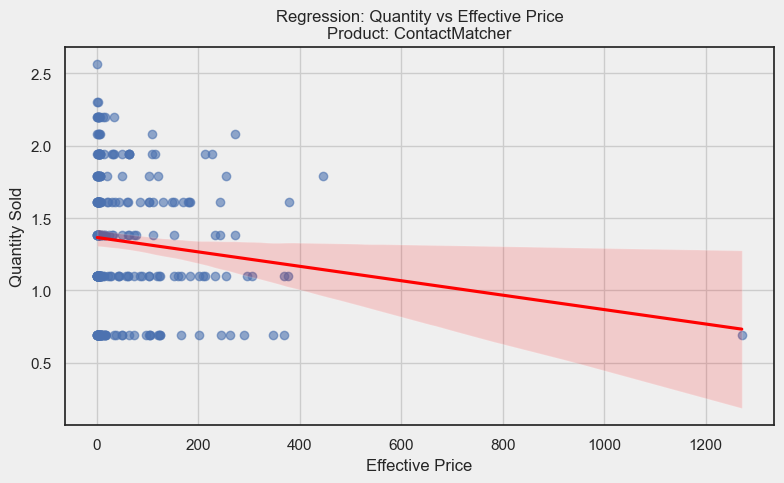

In [85]:
plot_regression_per_product(product_df, 'ContactMatcher')

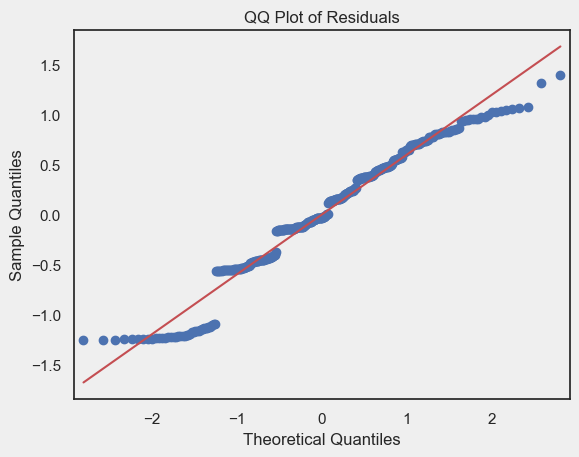

In [86]:
import scipy.stats as stats
sm.qqplot(cm_model.resid, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

Insights per Product
1. OneView
Price Elasticity = 0.012 → Very inelastic, price has almost no effect.
Discount Coef = -0.22 → Unexpected: higher discount might reduce quantity sold or higher discount applied on low quantity sales
Price pval = 0.79 → statistically significant
Discount p-value = 0.258 → not statistically significant
R² = 2.5% → Weak model.
Interpretation: Discounts are not clearly effective for OneView, and price changes barely matter to improve demand.

2. ContactMatcher
Price Elasticity = -0.018 → Nearly zero, but slightly negative (expected).
Discount Coef = 0.058 → Slight positive effect, but not significant.
R² = 0.7% → Model doesn’t explain much variation.
Interpretation: Price and discount have minimal impact on demand.

3. SaaS Connector Pack
Price Elasticity = 0.031, Discount Coef = 0.109 → Both coefficients are positive, which defies typical economic logic.

P-values > 0.05 and low R² → Not statistically or practically meaningful.

Interpretation: These results suggest there's no strong evidence that either price or discount are driving sales behavior here.

Summary
Insight	Explanation
Elasticities are weak	All products show very low price sensitivity, near zero.
Discounts not significant	Discount coefficients are not significant and even show counterintuitive signs.
Models are weak	R² is very low across the board (≤ 2.5%), so price + discount alone do not explain quantity sold.
Next steps	Consider alternative factors: customer segments, usage tier, contract type, or support service level.

#### discount reduction impact on profit model

In [87]:
cluster_1_APJ_df = APJ_df_clustered[APJ_df_clustered['Cluster']==1]

##### model

In [88]:
list_underpeformed_products

['ContactMatcher', 'SaaS Connector Pack', 'OneView']

In [89]:
def estimate_profit_gain(df, product_name, discount_reductions=[0.1, 0.2, 0.3]):
    prod_df = df[df['Product'] == product_name].copy()

    results = []
    for dr in discount_reductions:
        # New discount can't go below 0
        prod_df['new_discount'] = (prod_df['Discount'] - dr).clip(lower=0)
        prod_df['new_price'] = prod_df['unit_price'] * (1 - prod_df['new_discount'])
        prod_df['new_sales'] = prod_df['new_price'] * prod_df['Quantity']
        # Estimate additional profit assuming same quantity sold
        prod_df['sales_increase'] = (prod_df['new_price'] - prod_df['effective_price']) * prod_df['Quantity']
        total_gain = prod_df['sales_increase'].sum()
        initial_sales = prod_df['Sales'].sum()
        new_sales = prod_df['new_sales'].sum()

        results.append({
            'Product': product_name,
            'Disc_reduce': f'{dr}',
            'Inital Sales' : initial_sales,
            'New Sales' : new_sales,
            'Sales increase': round(total_gain, 2)
        })

    return pd.DataFrame(results)

In [90]:
def compare_profit_before_after(df, product_name, discount_reduction=0.1):
    prod_df = df[df['Product'] == product_name].copy()


    # New discount and profit
    prod_df['new_discount'] = (prod_df['Discount'] - discount_reduction).clip(lower=0)
    prod_df['new_price'] = prod_df['unit_price'] * (1 - prod_df['new_discount'])
    prod_df['new_profit'] = (prod_df['new_price'] * prod_df['Quantity']) - prod_df['cogs']

    # Summing up profits
    initial_profit_total = prod_df['Profit'].sum()
    new_profit_total = prod_df['new_profit'].sum()

    # Prepare for plotting
    profit_df = pd.DataFrame({
        'Scenario': ['Before Discount Change', 'After Discount Reduction'],
        'Total Profit': [initial_profit_total, new_profit_total]
    })

    # Plot
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(data=profit_df, x='Scenario', y='Total Profit', width=0.2, palette=['#f14a16','#fc9918'])

    # Add text labels on each bar
    for p in ax.patches:
        value = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, value + 0.01 * max(profit_df['Total Profit']),
            f"{value:,.0f}", ha='center', va='bottom', fontsize=10)

# Titles and labels
    plt.title(f"Total Profit Before and After Discount Reduction\nProduct: {product_name} | Region: APJ", fontsize=12)
    plt.ylabel("Total Profit", fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

##### Analysis

In [91]:
APJ_df_2023 = APJ_df[APJ_df['year']==2023]

In [92]:
CM_increase = estimate_profit_gain(APJ_df_2023, 'ContactMatcher',discount_reductions=[0.1, 0.2, 0.3])
CM_increase

,Product,Disc_reduce,Inital Sales,New Sales,Sales increase
0,ContactMatcher,0.1,22563.266,27681.736,5118.47
1,ContactMatcher,0.2,22563.266,32800.206,10236.94
2,ContactMatcher,0.3,22563.266,37904.768,15341.50


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16740\1289722508.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




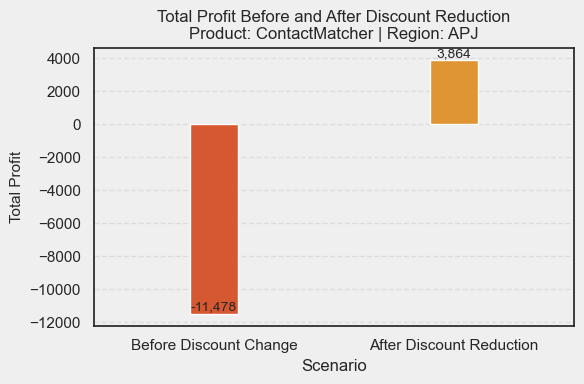

In [93]:
compare_profit_before_after(APJ_df_2023, 'ContactMatcher', discount_reduction=0.3)

In [94]:
estimate_profit_gain(APJ_df, 'SaaS Connector Pack',discount_reductions=[0.1, 0.2, 0.3])

,Product,Disc_reduce,Inital Sales,New Sales,Sales increase
0,SaaS Connector Pack,0.1,15353.61,17014.785,1661.17
1,SaaS Connector Pack,0.2,15353.61,18675.960,3322.35
2,SaaS Connector Pack,0.3,15353.61,20337.135,4983.52


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16740\1289722508.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




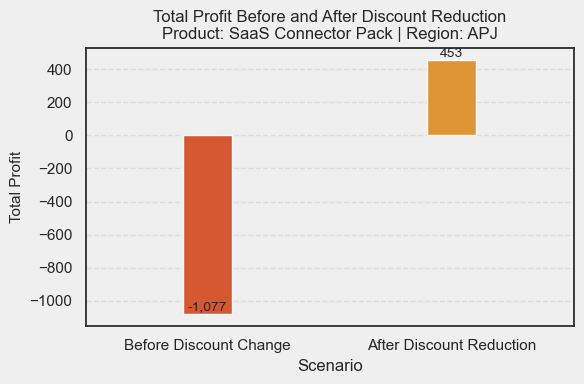

In [95]:
compare_profit_before_after(APJ_df_2023, 'SaaS Connector Pack', discount_reduction=0.3)

In [96]:
estimate_profit_gain(APJ_df_2023, 'OneView',discount_reductions=[0.1, 0.2, 0.3])

,Product,Disc_reduce,Inital Sales,New Sales,Sales increase
0,OneView,0.1,5782.004,6291.911,509.91
1,OneView,0.2,5782.004,6801.818,1019.81
2,OneView,0.3,5782.004,7311.725,1529.72


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16740\1289722508.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




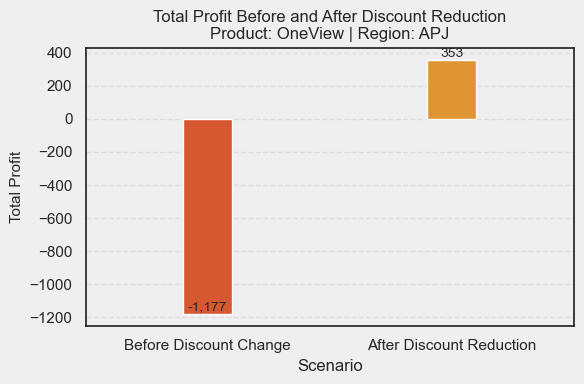

In [97]:
compare_profit_before_after(APJ_df_2023, 'OneView', discount_reduction=0.3)

In [98]:
simulation_df = APJ_df.copy()

In [99]:
discount_reduction = 0.2  # Example: reduce discount by 5%

# 2. Calculate new discount (clip to avoid negative values)
simulation_df['new_discount'] = (simulation_df['Discount'] - discount_reduction).clip(lower=0)

# 3. Calculate new price after discount
simulation_df['new_price'] = simulation_df['unit_price'] * (1 - simulation_df['new_discount'])

# 4. Calculate new profit
simulation_df['new_profit'] = (simulation_df['new_price'] * simulation_df['Quantity']) - simulation_df['cogs']



In [100]:
condition = (simulation_df['year'] == 2023) & (simulation_df['Product'].isin(list_underpeformed_products))
simulation_df.loc[condition, 'Profit'] = simulation_df.loc[condition, 'new_profit']

simulatedprofit_df = simulation_df.groupby('year')['Profit'].sum().reset_index().copy()

In [101]:
simulatedprofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    4 non-null      int32  
 1   Profit  4 non-null      float64
dtypes: float64(1), int32(1)
memory usage: 180.0 bytes


In [102]:
simulatedprofit_df

,year,Profit
0,2020,-5179.6750
1,2021,5912.9351
2,2022,7636.3522
3,2023,15420.9446


In [103]:
simulatedprofit_df['year'] = pd.to_datetime(simulatedprofit_df['year'].astype(int), format='%Y')

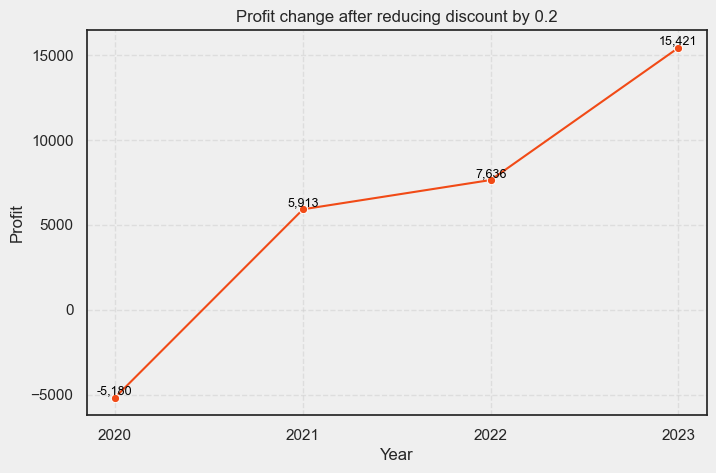

In [104]:

plt.figure(figsize=(8, 5))
sns.lineplot(data=simulatedprofit_df, x='year', y='Profit', marker='o', color='#f14a16')

for i in range(len(simulatedprofit_df)):
    plt.text(
        simulatedprofit_df['year'].iloc[i],             
        simulatedprofit_df['Profit'].iloc[i] + 200,    
        f"{simulatedprofit_df['Profit'].iloc[i]:,.0f}",
        ha='center', fontsize=9, color='black'
    )

import matplotlib.dates as mdates

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
ax.xaxis.set_major_locator(mdates.YearLocator())         

plt.xlabel("Year")
plt.ylabel("Profit")
plt.title(f"Profit change after reducing discount by {discount_reduction}")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [105]:
profit_by_year_APJ = APJ_df.groupby('year')['Profit'].sum().reset_index().copy()

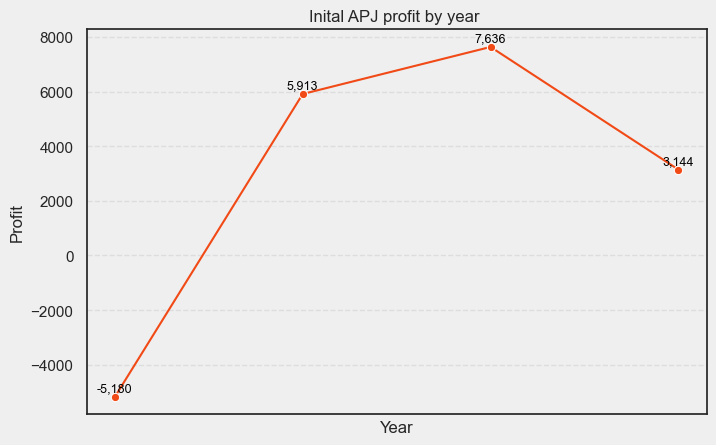

In [106]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=profit_by_year_APJ, x='year', y='Profit', marker='o', color='#f14a16')

for i in range(len(profit_by_year_APJ)):
    plt.text(
        profit_by_year_APJ['year'].iloc[i],             
        profit_by_year_APJ['Profit'].iloc[i] + 200,    
        f"{profit_by_year_APJ['Profit'].iloc[i]:,.0f}",
        ha='center', fontsize=9, color='black'
    )

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
ax.xaxis.set_major_locator(mdates.YearLocator())         

plt.xlabel("Year")
plt.ylabel("Profit")
plt.title(f"Inital APJ profit by year ")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [107]:
profit_by_year_APJ['year'] = pd.to_datetime(profit_by_year_APJ['year'].astype(int), format='%Y')

In [108]:
merged_profit = pd.merge(profit_by_year_APJ, simulatedprofit_df, how='left', on='year')
merged_profit.columns = ['year','Inital Profit','Simulated profit']

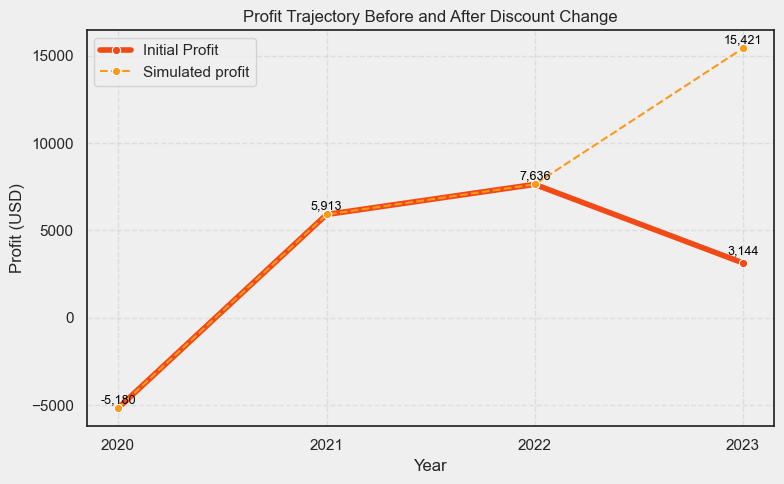

In [109]:
plt.figure(figsize=(8, 5))

# Line for initial profit
sns.lineplot(data=merged_profit, x='year', y='Inital Profit', marker='o', label='Initial Profit',linewidth=4, color='#f14a16')
plt.text(
        merged_profit['year'].iloc[3],             # x position
        merged_profit['Inital Profit'].iloc[3] + 500,    # y position (adjust for visibility)
        f"{merged_profit['Inital Profit'].iloc[3]:,.0f}",# formatted label
        ha='center', fontsize=9, color='black')
# Line for new profit
sns.lineplot(data=merged_profit, x='year', y='Simulated profit', marker='o', label='Simulated profit',linewidth=1.5, linestyle='--' ,color='#fc9918')
for i in range(len(merged_profit)):
    plt.text(
        merged_profit['year'].iloc[i],             # x position
        merged_profit['Simulated profit'].iloc[i] + 300,    # y position (adjust for visibility)
        f"{merged_profit['Simulated profit'].iloc[i]:,.0f}",# formatted label
        ha='center', fontsize=9, color='black')


# Format x-axis as years only
import matplotlib.dates as mdates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())

plt.title("Profit Trajectory Before and After Discount Change")
plt.xlabel("Year")
plt.ylabel("Profit (USD)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [110]:
merged_profit

,year,Inital Profit,Simulated profit
0,2020-01-01,-5179.6750,-5179.6750
1,2021-01-01,5912.9351,5912.9351
2,2022-01-01,7636.3522,7636.3522
3,2023-01-01,3144.3746,15420.9446
